# <center><big> Partie 3 : PageRank - version itérative, analyse </big> </center>

###### Exercice 1

In [150]:

from numpy import *
import random as rd
import matplotlib.pyplot as plt
A = array([[0.0,1.0,1,1,1,1,0,0,0,0,0,0,0,0],
           [1,0,1,0,0,0,0,0,0,0,0,0,0,0],
           [1,0,0,1,0,0,0,0,0,0,0,0,0,0],
           [1,0,0,0,1,0,0,0,0,0,0,0,0,0],
           [1,1,0,0,0,0,0,0,0,0,0,0,0,0],
           [0,0,0,0,0,0,1,1,1,0,0,0,0,0],
           [1,0,0,0,0,0,0,1,0,0,0,0,0,0],
           [0,0,0,0,0,1,0,0,0,0,0,0,0,0],
           [0,0,0,0,0,0,0,1,0,1,0,0,0,0],
           [0,0,0,0,0,1,0,0,0,0,1,1,1,1],
           [0,0,0,0,0,0,0,0,0,1,0,1,0,0],
           [0,0,0,0,0,0,0,0,0,1,0,0,1,0],
           [0,0,0,0,0,0,0,0,0,1,0,0,0,1],
           [0,0,0,0,0,0,0,0,0,1,1,0,0,0]])

def norme(X):
    norm = 0
    for i in range(len(X)):
        norm = norm + X[i]**2
    return sqrt(norm)

def puissance_iteree(e, M):
    Xbis = []
    for i in range(len(M)):
        Xbis.append(rd.randint(0, 100))
    while (True):
        prevXbis = Xbis
        Xbis = (M.dot(Xbis)) / norme(M.dot(Xbis))
        if (norme(Xbis - prevXbis) < e):
            break
    return norme(M.dot(Xbis)),Xbis

In [151]:
def nombreLinks(M, j):
    count = 0
    for i in range(len(M)):
        count = count + M[i][j]
    return count;

def transitionMatrice(M, a):
    P = M
    N = len(P)
    for i in range(N):
        for j in range(N):
            if (nombreLinks(M, j) != 0):
                P[i][j] = a*M[i][j] + ((1 - a)/N)
            else:
                P[i][j] = 1/N
    return P

def pageRankMatrice(M):
    Q = M
    N = len(Q)
    for i in range(N):
        for j in range(N):
            if (nombreLinks(M, j) != 0):
                Q[i][j] = Q[i][j] / nombreLinks(M, j)
            else:
                Q[i][j] = 0
    return Q


valeur score A3: [0.26726124 0.26726124 0.26726124 0.26726124 0.26726124 0.26726124
 0.26726124 0.26726124 0.26726124 0.26726124 0.26726124 0.26726124
 0.26726124 0.26726124]

valeur score A3*r - r: [0.00000000e+00 0.00000000e+00 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 0.00000000e+00 0.00000000e+00]

valeur score A4: [0.26726124 0.26726124 0.26726124 0.26726124 0.26726124 0.26726124
 0.26726124 0.26726124 0.26726124 0.26726124 0.26726124 0.26726124
 0.26726124 0.26726124]

valeur score A4*r - r: [-5.55111512e-17 -5.55111512e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.55111512e-17  5.55111512e-17]

valeur3: 0.9999999999999999
valeur4: (0.9999999999999999, array([0.26726124, 0.26726124, 0.26726124, 0.26726124, 0.26726124,
       0.26726124, 0.26726124,

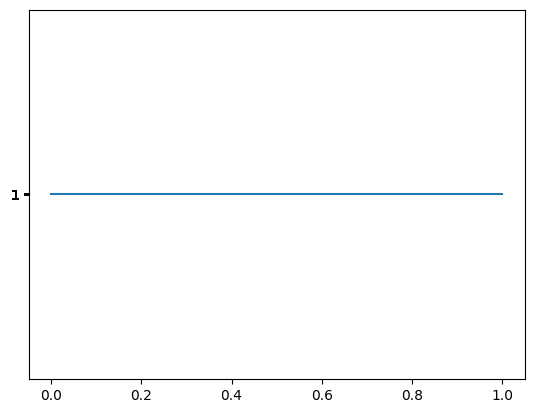

In [180]:
A2 = pageRankMatrice(A)
#print(A2)
#print()

A3 = transitionMatrice(A2, 0.85)
print()
r = puissance_iteree (10**-2, A3)[1]
print("valeur score A3:", r)
print()
print("valeur score A3*r - r:", A3.dot(r) - r)
print()

A4 = transitionMatrice(A2, 0.5)
r = puissance_iteree (10**-2, A4)[1]
print("valeur score A4:", r)
print()
print("valeur score A4*r - r:", A4.dot(r) - r)
print()

A5 = transitionMatrice(A2,0.00)
#print()
print("valeur3:",puissance_iteree (10**-5, A5)[0])
#print()


A6 = transitionMatrice(A2,0.3)
#print()
print("valeur4:",puissance_iteree (10**-5, A6))
#print()

x = linspace(0,1.0,20)
y = []
for i in range(len(x)):
    y.append(puissance_iteree (10**-5, transitionMatrice(A2, x[i]))[0])
y = array(y)

plt.yticks(arange(1 + 10**-15, (1 + 2*10**-15), 10**-17))

plt.plot(x,y)
plt.show()